# **Results of Bleeding Reduction**

In [3]:
import numpy as np
import librosa as lb
import soundfile as sf
from tqdm import tqdm
import museval
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### **LOADING CSV**

In [9]:
# trucated U Net (t-UNet)
path1 = "/home/rajesh/Desktop/Clean/tUNet/"
tunet1 = pd.read_csv(path1+'tUNet_sdr1.csv')
tunet2 = pd.read_csv(path1+'tUNet_sdr2.csv')

In [11]:
# KAMIR
path2 = "/home/rajesh/Desktop/Clean/KAMIR/"
kamir1 = pd.read_csv(path2+'kamir1.csv')
kamir2 = pd.read_csv(path2+'kamir2.csv')

In [12]:
# CAEs
path3 = "/home/rajesh/Desktop/Clean/CAE/"
cae1 = pd.read_csv(path3+'cae_sdr1.csv')
cae2 = pd.read_csv(path3+'cae_sdr2.csv')

In [15]:
# dfUNet: dialated full U Net
path4 = "/home/rajesh/Desktop/Clean/dfUNet/"

# Seperate models
dfunet1_lm_lm = pd.read_csv(path4+'LM_Model/LM_Test/dfUNet_sdr1.csv')
dfunet2_lm_lm = pd.read_csv(path4+'LM_Model/LM_Test/dfUNet_sdr2.csv')

dfunet1_lm_cm = pd.read_csv(path4+'LM_Model/CM_Test/dfUNet_sdr1_cm.csv')
dfunet2_lm_cm = pd.read_csv(path4+'LM_Model/CM_Test/dfUNet_sdr2_cm.csv')

dfunet1_cm_lm = pd.read_csv(path4+'CM_Model/LM_Test/dfUNetcm_sdr1_lm.csv')
dfunet2_cm_lm = pd.read_csv(path4+'CM_Model/LM_Test/dfUNetcm_sdr2_lm.csv')

dfunet1_cm_cm = pd.read_csv(path4+'CM_Model/CM_Test/dfUNetcm_sdr1_cm.csv')
dfunet2_cm_cm = pd.read_csv(path4+'CM_Model/CM_Test/dfUNetcm_sdr2_cm.csv')

# Combined model
dfunet1_lmcm_cm = pd.read_csv(path4+'LMCM_Model/CM_Test/dfUNetlmcm_sdr1_cm.csv')
dfunet2_lmcm_cm = pd.read_csv(path4+'LMCM_Model/CM_Test/dfUNetlmcm_sdr2_cm.csv')

dfunet1_lmcm_lm = pd.read_csv(path4+'LMCM_Model/LM_Test/dfUNetlmcm_sdr1_lm.csv')
dfunet2_lmcm_lm = pd.read_csv(path4+'LMCM_Model/LM_Test/dfUNetlmcm_sdr2_lm.csv')

# Finetuned models
dfunet1_cmflm_lm = pd.read_csv(path4+'CM_FinetunedLM/dfUNetcmflm_sdr1_lm.csv')
dfunet2_cmflm_lm = pd.read_csv(path4+'CM_FinetunedLM/dfUNetcmflm_sdr2_lm.csv')

dfunet1_cmflm_cm = pd.read_csv(path4+'CM_FinetunedLM/dfUNetcmflm_sdr1_cm.csv')
dfunet2_cmflm_cm = pd.read_csv(path4+'CM_FinetunedLM/dfUNetcmflm_sdr2_cm.csv')

In [42]:
# dfUNet_GE: dialated full U Net with Graph Attentions
path5 = "/home/rajesh/Desktop/Clean/dfUNet_GE/"
dfunetGE1 = pd.read_csv(path5+'dfUNetGE_sdr1.csv')
dfunetGE2 = pd.read_csv(path5+'dfUNetGE_sdr2.csv')

# Pooling LM and CM
dfunetGE1_lmcm_cm = pd.read_csv(path5+'LMandCM/dfUNetGE_sdr1_cm.csv')
dfunetGE2_lmcm_cm = pd.read_csv(path5+'LMandCM/dfUNetGE_sdr2_cm.csv')

dfunetGE1_lmcm_lm = pd.read_csv(path5+'LMandCM/dfUNetGE_sdr1.csv')
dfunetGE2_lmcm_lm = pd.read_csv(path5+'LMandCM/dfUNetGE_sdr2.csv')

### **Linear Mixtures** (till WASPAA)

In [21]:
sdr1 = [kamir1['Overall sdr'][:100], kamir1['Pred Overall sdr'][:100],
        cae1['Pred Overall sdr'][:100], tunet1['Pred Overall sdr'][:100]]

In [22]:
sdr2 = [kamir2['Overall sdr'][:100], kamir2['Pred Overall sdr'][:100],
        cae2['Pred Overall sdr'][:100], tunet2['Pred Overall sdr'][:100]]

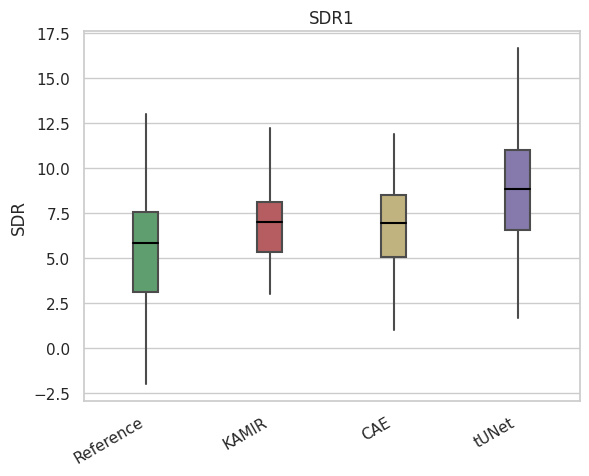

In [23]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR1')
ax.set_xticklabels(['Reference', 'KAMIR', 'CAE', 'tUNet'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

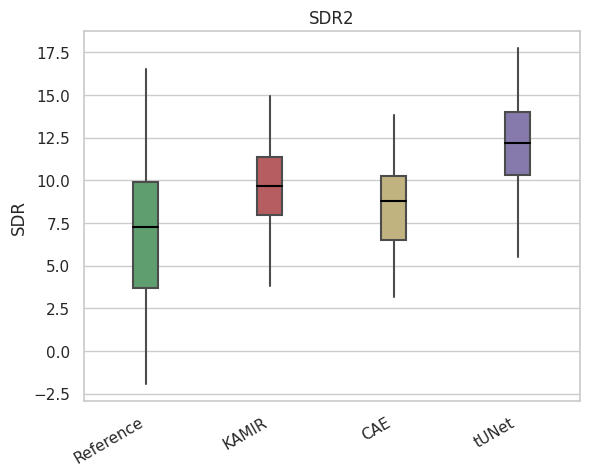

In [24]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr2,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR2')
ax.set_xticklabels(['Reference', 'KAMIR', 'CAE', 'tUNet'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### **Linear Mixtures: Graph Attentions**

In [25]:
sdr1 = [kamir1['Overall sdr'][:100], kamir1['Pred Overall sdr'][:100],
        cae1['Pred Overall sdr'][:100], tunet1['Pred Overall sdr'][:100],
       dfunet1_lm_lm['Pred Overall sdr'][:100], dfunetGE1['Pred Overall sdr'][:100]]

In [26]:
sdr2 = [kamir2['Overall sdr'][:100], kamir2['Pred Overall sdr'][:100],
        cae2['Pred Overall sdr'][:100], tunet2['Pred Overall sdr'][:100],
       dfunet2_lm_lm['Pred Overall sdr'][:100], dfunetGE2['Pred Overall sdr'][:100]]

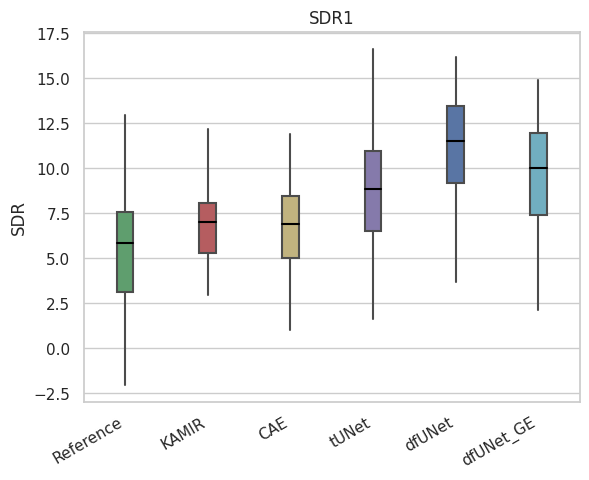

In [27]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR1')
ax.set_xticklabels(['Reference', 'KAMIR', 'CAE', 'tUNet', 'dfUNet', 'dfUNet_GE'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

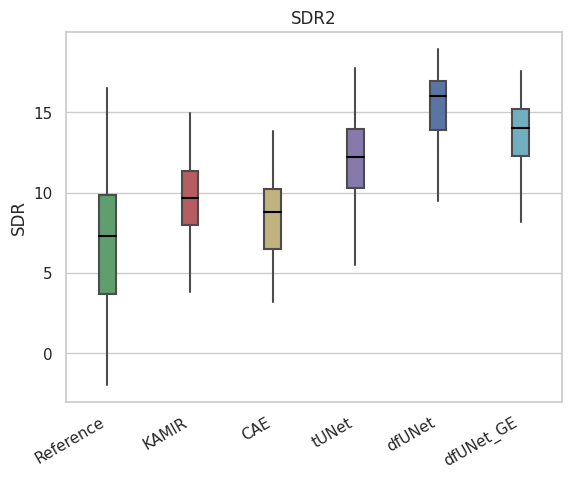

In [28]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr2,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2,  palette=my_clr
)
ax.set(xlabel='', ylabel='SDR', title='SDR2')
ax.set_xticklabels(['Reference', 'KAMIR', 'CAE', 'tUNet','dfUNet', 'dfUNet_GE'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### **LM and CM Mixtures**

In [29]:
sdr1 = [dfunet1_lm_lm['Overall sdr'][:100], 
        dfunet1_lm_cm['Overall sdr'][:100],
        kamir1['Pred Overall sdr'][:100],
        dfunet1_lm_lm['Pred Overall sdr'][:100],
        dfunet1_lm_cm['Pred Overall sdr'][:100],
        dfunet1_cm_lm['Pred Overall sdr'][:100],
       dfunet1_cm_cm['Pred Overall sdr'][:100]]

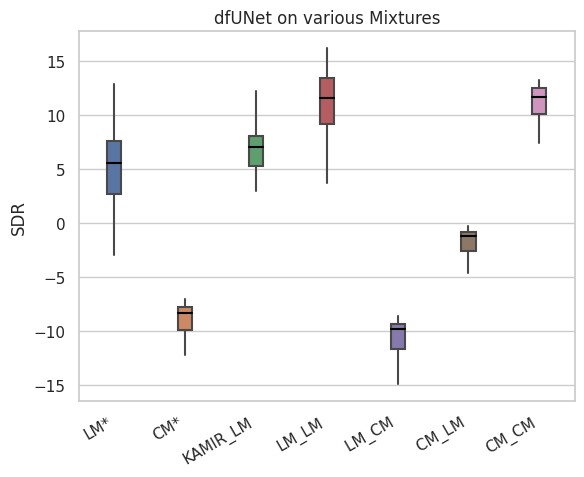

In [30]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='dfUNet on various Mixtures')
ax.set_xticklabels([ 'LM*','CM*', 'KAMIR_LM', 'LM_LM', ' LM_CM', ' CM_LM', 'CM_CM'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

In [31]:
sdr2 = [dfunet2_lm_lm['Overall sdr'][:100], 
        dfunet2_lm_cm['Overall sdr'][:100],
        kamir2['Pred Overall sdr'][:100],
        dfunet2_lm_lm['Pred Overall sdr'][:100],
        dfunet2_lm_cm['Pred Overall sdr'][:100],
        dfunet2_cm_lm['Pred Overall sdr'][:100],
       dfunet2_cm_cm['Pred Overall sdr'][:100]]

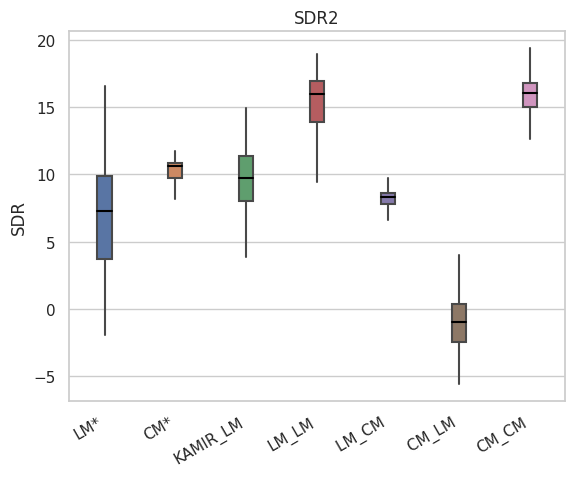

In [32]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr2,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='SDR2')
ax.set_xticklabels(['LM*','CM*', 'KAMIR_LM', 'LM_LM', ' LM_CM', ' CM_LM', 'CM_CM'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### **Pooled data (LM+CM) and trained**

In [33]:
sdr1 = [dfunet1_lm_lm['Overall sdr'][:100], 
        dfunet1_lm_cm['Overall sdr'][:100],
        dfunet1_lm_lm['Pred Overall sdr'][:100],
        dfunet1_lm_cm['Pred Overall sdr'][:100],
        dfunet1_cm_lm['Pred Overall sdr'][:100],
       dfunet1_cm_cm['Pred Overall sdr'][:100],
       dfunet1_lmcm_lm['Pred Overall sdr'][:100],
       dfunet1_lmcm_cm['Pred Overall sdr'][:100]]

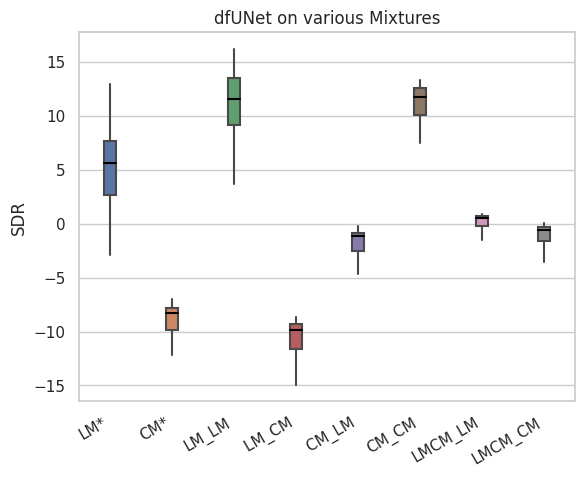

In [34]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=sdr1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='dfUNet on various Mixtures')
ax.set_xticklabels([ 'LM*','CM*', 'LM_LM', ' LM_CM', ' CM_LM', 'CM_CM', 'LMCM_LM', 'LMCM_CM'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### **Finetuning**

In [35]:
finetuningsdr1 = [dfunet1_lm_lm['Overall sdr'][:100], 
        dfunet1_lm_cm['Overall sdr'][:100],
        dfunet1_lm_lm['Pred Overall sdr'][:100],
        dfunet1_lm_cm['Pred Overall sdr'][:100],
        dfunet1_cm_lm['Pred Overall sdr'][:100],
       dfunet1_cm_cm['Pred Overall sdr'][:100],
       dfunet1_lmcm_lm['Pred Overall sdr'][:100],
       dfunet1_lmcm_cm['Pred Overall sdr'][:100],
                 dfunet1_cmflm_lm['Pred Overall sdr'][:100],
                 dfunet1_cmflm_cm['Pred Overall sdr'][:100]]

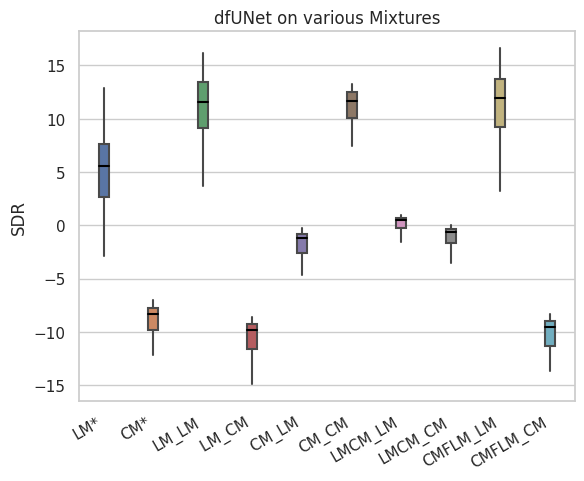

In [36]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white', 9:'black'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=finetuningsdr1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='dfUNet on various Mixtures')
ax.set_xticklabels([ 'LM*','CM*', 'LM_LM', ' LM_CM', ' CM_LM', 'CM_CM', 'LMCM_LM', 'LMCM_CM', 'CMFLM_LM', 'CMFLM_CM'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

In [37]:
np.mean(dfunet1_lm_lm['Pred Overall sdr'][:100]), np.mean(dfunet1_cmflm_lm['Pred Overall sdr'][:100])

(10.605175541631011, 10.892892489086753)

In [38]:
np.median(dfunet1_lm_lm['Pred Overall sdr'][:100]), np.median(dfunet1_cmflm_lm['Pred Overall sdr'][:100])

(11.541937501803204, 11.928859300242586)

In [39]:
finetuningsdr2 = [dfunet2_lm_lm['Overall sdr'][:100], 
        dfunet2_lm_cm['Overall sdr'][:100],
        dfunet2_lm_lm['Pred Overall sdr'][:100],
        dfunet2_lm_cm['Pred Overall sdr'][:100],
        dfunet2_cm_lm['Pred Overall sdr'][:100],
       dfunet2_cm_cm['Pred Overall sdr'][:100],
       dfunet2_lmcm_lm['Pred Overall sdr'][:100],
       dfunet2_lmcm_cm['Pred Overall sdr'][:100],
                 dfunet2_cmflm_lm['Pred Overall sdr'][:100],
                 dfunet2_cmflm_cm['Pred Overall sdr'][:100]]

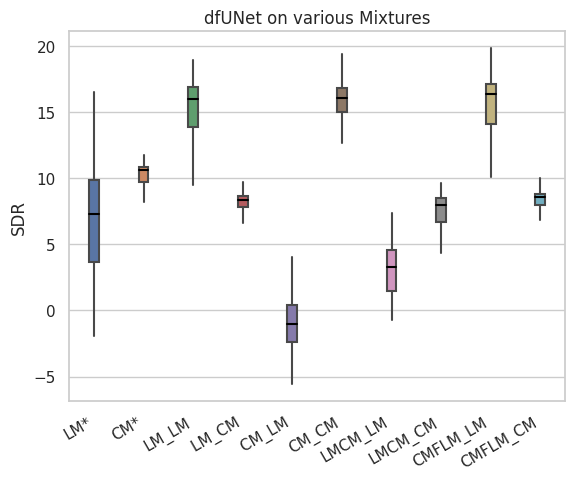

In [40]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white', 9:'black'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=finetuningsdr2,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='dfUNet on various Mixtures')
ax.set_xticklabels([ 'LM*','CM*', 'LM_LM', ' LM_CM', ' CM_LM', 'CM_CM', 'LMCM_LM', 'LMCM_CM', 'CMFLM_LM', 'CMFLM_CM'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### **LM+CM on Graphs**

In [61]:
graphlmcm1 = [dfunetGE1_lmcm_lm['Overall sdr'][:100],
               dfunetGE1_lmcm_cm['Overall sdr'][:100],
              dfunet1_lmcm_lm['Pred Overall sdr'][:100],
               dfunetGE1_lmcm_lm['Pred Overall sdr'][:100],
              dfunet1_lmcm_cm['Pred Overall sdr'][:100],
               dfunetGE1_lmcm_cm['Pred Overall sdr'][:100]]

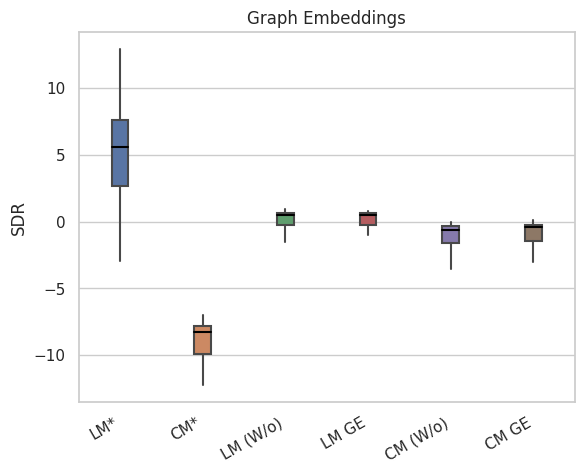

In [63]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white', 9:'black'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=graphlmcm1,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='Graph Embeddings')
ax.set_xticklabels([ 'LM*','CM*', 'LM (W/o)', ' LM GE', 'CM (W/o)', 'CM GE'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

In [68]:
np.median(dfunet1_lmcm_lm['Pred Overall sdr'][:100]),np.median(dfunetGE1_lmcm_lm['Pred Overall sdr'][:100]),np.median(dfunet1_lmcm_cm['Pred Overall sdr'][:100]),np.median(dfunetGE1_lmcm_cm['Pred Overall sdr'][:100])

(0.5111958845970126,
 0.5305042986805688,
 -0.6105590472668898,
 -0.39896810923498066)

In [69]:
graphlmcm2 = [dfunetGE2_lmcm_lm['Overall sdr'][:100],
               dfunetGE2_lmcm_cm['Overall sdr'][:100],
              dfunet2_lmcm_lm['Pred Overall sdr'][:100],
               dfunetGE2_lmcm_lm['Pred Overall sdr'][:100],
              dfunet2_lmcm_cm['Pred Overall sdr'][:100],
               dfunetGE2_lmcm_cm['Pred Overall sdr'][:100]]

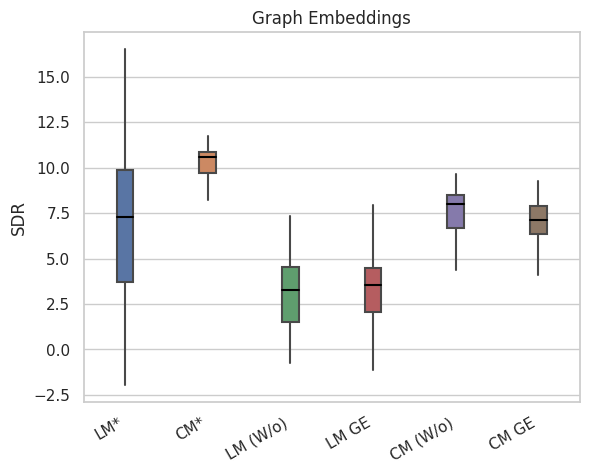

In [70]:
my_clr = {0: "g", 1: "r", 2: "y", 3:"m", 4:"b", 5:"c", 6:"orange", 7:"grey", 8:'white', 9:'black'}
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=graphlmcm2,
    notch=False, showcaps=False,  showfliers = False,
    flierprops={"marker": "x"},
    medianprops={"color": "black"}, width=0.2
)
ax.set(xlabel='', ylabel='SDR', title='Graph Embeddings')
ax.set_xticklabels([ 'LM*','CM*', 'LM (W/o)', ' LM GE', 'CM (W/o)', 'CM GE'])
plt.xticks(rotation=30, ha='right')
ax.plot()
plt.show()

### 